Text(0.5, 1.0, '테스트입니다')

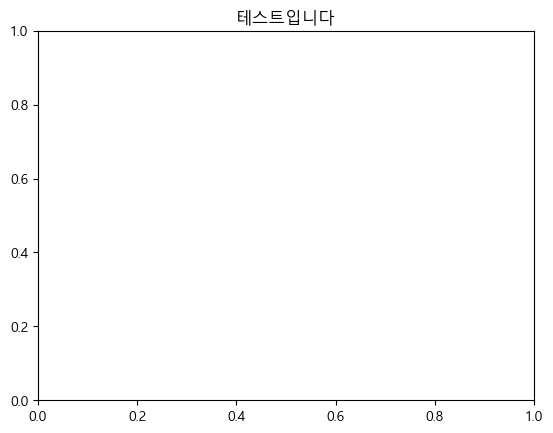

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import FinanceDataReader as fdr

from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
plt.style.use('default')
f_path = "C:/windows/Fonts/malgun.ttf"
ko_font = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
plt.title('테스트입니다')

In [83]:
# Data Load
kr_mon = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH_1012/1028/kr_earning_150.csv', index_col = 0)
ov_mon = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH_1012/1028/ov_earning_150.csv', index_col = 0)
kr_sec = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH_1012/1028/kr_sec_150.csv', index_col = 0)
ov_sec = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH_1012/1028/ov_sec_150.csv', index_col = 0)
kr_price = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH_1012/1028/kr_price_150.csv', index_col = 0)
ov_price = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH_1012/1028/ov_price_150.csv', index_col = 0)
eco = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH_1012/1028/economics.csv', index_col = 0)

In [87]:
eco.set_index(keys = 'Date', inplace = True)

In [88]:
# Sector별 종목명 추출
#국내
col_kr = kr_price.columns.to_list()

자유소비재_kr = kr_sec[kr_sec['sector']=='자유소비재']['종목명'].to_list()
col_자유_kr = [x for x in 자유소비재_kr if x in col_kr]

소재_kr = kr_sec[kr_sec['sector']=='소재']['종목명'].to_list()
col_소재_kr = [x for x in 소재_kr if x in col_kr]

필수소비재_kr = kr_sec[kr_sec['sector']=='필수소비재']['종목명'].to_list()
col_필수_kr = [x for x in 필수소비재_kr if x in col_kr]

정보기술_kr = kr_sec[kr_sec['sector']=='정보기술']['종목명'].to_list()
col_정보_kr = [x for x in 정보기술_kr if x in col_kr]

커뮤니케이션서비스_kr = kr_sec[kr_sec['sector']=='커뮤니케이션서비스']['종목명'].to_list()
col_커뮤_kr = [x for x in 커뮤니케이션서비스_kr if x in col_kr]

금융_kr = kr_sec[kr_sec['sector']=='금융']['종목명'].to_list()
col_금융_kr = [x for x in 금융_kr if x in col_kr]

유틸리티_kr = kr_sec[kr_sec['sector']=='유틸리티']['종목명'].to_list()
col_유틸_kr = [x for x in 유틸리티_kr if x in col_kr]

산업재_kr = kr_sec[kr_sec['sector']=='산업재']['종목명'].to_list()
col_산업_kr = [x for x in 산업재_kr if x in col_kr]

에너지_kr = kr_sec[kr_sec['sector']=='에너지']['종목명'].to_list()
col_에너지_kr = [x for x in 에너지_kr if x in col_kr]

헬스케어_kr = kr_sec[kr_sec['sector']=='헬스케어']['종목명'].to_list()
col_헬스_kr = [x for x in 헬스케어_kr if x in col_kr]

#해외
col_ov = ov_price.columns.to_list()

자유소비재_ov = ov_sec[ov_sec['sector']=='자유소비재']['종목명'].to_list()
col_자유_ov = [x for x in 자유소비재_ov if x in col_ov]

소재_ov = ov_sec[ov_sec['sector']=='소재']['종목명'].to_list()
col_소재_ov = [x for x in 소재_ov if x in col_ov]

필수소비재_ov = ov_sec[ov_sec['sector']=='필수소비재']['종목명'].to_list()
col_필수_ov = [x for x in 필수소비재_ov if x in col_ov]

정보기술_ov = ov_sec[ov_sec['sector']=='정보기술']['종목명'].to_list()
col_정보_ov = [x for x in 정보기술_ov if x in col_ov]

커뮤니케이션서비스_ov = ov_sec[ov_sec['sector']=='커뮤니케이션서비스']['종목명'].to_list()
col_커뮤_ov = [x for x in 커뮤니케이션서비스_ov if x in col_ov]

금융_ov = ov_sec[ov_sec['sector']=='금융']['종목명'].to_list()
col_금융_ov = [x for x in 금융_ov if x in col_ov]

유틸리티_ov = ov_sec[ov_sec['sector']=='유틸리티']['종목명'].to_list()
col_유틸_ov = [x for x in 유틸리티_ov if x in col_ov]

산업재_ov = ov_sec[ov_sec['sector']=='산업재']['종목명'].to_list()
col_산업_ov = [x for x in 산업재_ov if x in col_ov]

에너지_ov = ov_sec[ov_sec['sector']=='에너지']['종목명'].to_list()
col_에너지_ov = [x for x in 에너지_ov if x in col_ov]

헬스케어_ov = ov_sec[ov_sec['sector']=='헬스케어']['종목명'].to_list()
col_헬스_ov = [x for x in 헬스케어_ov if x in col_ov]

# 국내 해외 전체 시각화

In [89]:
stock = pd.merge(kr_price, ov_price, how = 'left', left_index=True, right_index=True)

In [90]:
stock

,BGF리테일,CJ,CJ대한통운,CJ제일제당,DB손해보험,DB하이텍,F&F,GS,GS리테일,HD한국조선해양,...,ENTG,ISRG,ILMN,CSX,STX,ZM,GMAB,XEL,RPRX,WTW
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,199000.0,83400.0,89700.0,369000.0,63600.0,37500.0,139000.0,41600.0,28000.0,69500.0,...,64.13,265.63,200.87,30.88,51.880,66.66,43.03,70.07,39.40,245.18
2023-01-04,197500.0,82500.0,87700.0,349000.0,64600.0,39800.0,136000.0,41700.0,27950.0,74400.0,...,67.28,270.00,202.61,31.28,52.490,67.65,42.51,70.67,39.15,246.49
2023-01-05,192000.0,81200.0,89300.0,338000.0,64500.0,39450.0,135500.0,41800.0,27350.0,73400.0,...,66.71,268.62,201.15,30.91,53.490,65.62,42.12,69.24,38.64,246.44
2023-01-06,191500.0,80800.0,88700.0,340000.0,67300.0,42000.0,126000.0,42050.0,27100.0,74000.0,...,70.33,270.39,201.87,32.20,55.910,69.51,42.89,71.29,38.09,253.43
2023-01-07,191500.0,80800.0,88700.0,340000.0,67300.0,42000.0,126000.0,42050.0,27100.0,74000.0,...,70.33,270.39,201.87,32.20,55.910,69.51,42.89,71.29,38.09,253.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-26,161000.0,66900.0,78700.0,304000.0,81200.0,51600.0,101200.0,37650.0,23750.0,111800.0,...,96.48,297.55,158.08,30.91,64.420,67.70,37.43,57.58,30.21,205.60
2023-08-27,161000.0,66900.0,78700.0,304000.0,81200.0,51600.0,101200.0,37650.0,23750.0,111800.0,...,96.48,297.55,158.08,30.91,64.420,67.70,37.43,57.58,30.21,205.60
2023-08-28,160200.0,69000.0,81000.0,308500.0,82300.0,52500.0,103500.0,38550.0,23700.0,120400.0,...,97.16,301.48,158.20,30.86,66.065,67.57,38.27,57.85,30.39,206.50


### 상관행렬 생성

- 임계값 +-0.7 이하의 엣지는 제거

In [91]:
#상관행렬 생성
stock_cor = stock.dropna(axis = 1).corr(method = 'pearson')

# convert matrix to list of edges and rename the columns
edges = stock_cor.stack().reset_index()
edges.columns = ["종목_1", "종목_2", "correlation"]

# remove self correlations
edges = edges.loc[edges["종목_1"] != edges["종목_2"]].copy()

# 임계값(+-0.7) 이하 제거
threshold = 0.7

# 기본 무방향 그래프 생성
Gx = nx.from_pandas_edgelist(edges, "종목_1", "종목_2", edge_attr=["correlation"])

# list to store edges to remove
remove = []
# loop through edges in Gx and find correlations which are below the threshold
for 종목_1, 종목_2 in Gx.edges():
    corr = Gx[종목_1][종목_2]["correlation"]
    # add to remove node list if abs(corr) < threshold
    if abs(corr) < threshold:
        remove.append((종목_1, 종목_2))

# remove edges contained in the remove list
Gx.remove_edges_from(remove)

print(str(len(remove)) + " edges removed")

35446 edges removed


### 노드에 국내인지 해외인지 속성 부여

In [11]:
# 국내인지 해외인지 속성 부여하기
# korea = kr_price.columns.to_list()
# nasdaq = ov_price.columns.to_list()

# Gx.add_nodes_from(korea, where='국내')
# Gx.add_nodes_from(nasdaq, where='해외')

# # 국내, 해외 color map 만들기
# color_map = []
# for n, d in Gx.nodes(data=True):
#     if d['where'] == '국내':
#          color_map.append('skyblue')   # 국내: skyblue
#     else: 
#          color_map.append('pink')   # 해외: pink

### 노드 색상, 크기, 엣지의 두께 기능 함수인데 여기 시각화에서는 사용하지 않음

In [12]:
#색상, 모서리 두께 및 노드 크기 기능
def assign_colour(correlation):
    if correlation <= 0:
        return "#ffa09b"  # red
    else:
        return "#9eccb7"  # green


def assign_thickness(correlation, benchmark_thickness=2, scaling_factor=3):
    return benchmark_thickness * abs(correlation) ** scaling_factor


def assign_node_size(degree, scaling_factor=50):
    return degree * scaling_factor

### 위의 함수 사용하여 color map 만드는 것. 여기 시각화에서는 사용하지 않음

In [13]:
# assign colours to edges depending on positive or negative correlation
# assign edge thickness depending on magnitude of correlation
edge_colours = []
edge_width = []
for key, value in nx.get_edge_attributes(Gx, "correlation").items():
    edge_colours.append(assign_colour(value))
    edge_width.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size = []
for key, value in dict(Gx.degree).items():
    node_size.append(assign_node_size(value))

### 위의 함수 활용하며 기본 networkx 사용해서 그림 그리는 거, 전체 종목이라 시간이 걸리며 시각적으로 예쁘지 않음. 고로 아래에서 pyvis 활용하여 시각화

In [14]:
# draw improved graph
# sns.set(rc={"figure.figsize": (10, 10)})
# font_dict = {"fontsize": 10}

# nx.draw_networkx(
#     Gx,
#     pos=nx.kamada_kawai_layout(Gx),
#     with_labels=True,
#     node_size=node_size,
#     node_color= color_map,
#     edge_color=edge_colours,
#     width=edge_width,
#     font_family = ko_font
# )

# plt.title("Asset price correlations - Fruchterman-Reingold layout", fontdict=font_dict)
# plt.show()

### 노드 크기 및 노드 속성 부여

In [94]:
# 국내인지 해외인지 속성 부여하기
korea = kr_price.columns.to_list()
nasdaq = ov_price.columns.to_list()

#노드 사이즈가 너무 차이가 많이 나서 여기서는 제외
degree_dict = dict(nx.degree(Gx))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx.add_node(stock_list[i], size = nsize[i]*.1)

In [95]:
Gx.nodes(data = True)

NodeDataView({'BGF리테일': {'size': 5.1000000000000005}, 'CJ': {'size': 4.2}, 'CJ대한통운': {'size': 4.9}, 'CJ제일제당': {'size': 8.1}, 'DB손해보험': {'size': 0.5}, 'DB하이텍': {'size': 1.7000000000000002}, 'F&F': {'size': 9.9}, 'GS': {'size': 9.9}, 'GS리테일': {'size': 13.700000000000001}, 'HD한국조선해양': {'size': 14.200000000000001}, 'HD현대': {'size': 0.0}, 'HD현대인프라코어': {'size': 11.3}, 'HD현대일렉트릭': {'size': 13.5}, 'HD현대중공업': {'size': 10.4}, 'HLB': {'size': 0.1}, 'HL만도': {'size': 0.7000000000000001}, 'HMM': {'size': 9.1}, 'HPSP': {'size': 13.8}, 'KB금융': {'size': 2.6}, 'KCC': {'size': 3.0}, 'KG모빌리티': {'size': 14.5}, 'KT': {'size': 2.3000000000000003}, 'KT&G': {'size': 7.0}, 'LG': {'size': 0.6000000000000001}, 'LG디스플레이': {'size': 0.9}, 'LG생활건강': {'size': 14.3}, 'LG에너지솔루션': {'size': 1.3}, 'LG유플러스': {'size': 3.9000000000000004}, 'LG이노텍': {'size': 0.1}, 'LG전자': {'size': 2.0}, 'LG화학': {'size': 0.7000000000000001}, 'LIG넥스원': {'size': 0.4}, 'LS': {'size': 10.100000000000001}, 'LS ELECTRIC': {'size': 13.100000000000001}

In [96]:
Gx.add_nodes_from(korea, shape = 'star')
Gx.add_nodes_from(nasdaq, shape = 'dot')

Gx.add_nodes_from(col_자유_kr, group = 1)
Gx.add_nodes_from(col_소재_kr, group = 2)
Gx.add_nodes_from(col_필수_kr, group = 3)
Gx.add_nodes_from(col_정보_kr, group = 4)
Gx.add_nodes_from(col_커뮤_kr, group = 5)
Gx.add_nodes_from(col_금융_kr, group = 6)
Gx.add_nodes_from(col_유틸_kr, group = 7)
Gx.add_nodes_from(col_산업_kr, group = 8)
Gx.add_nodes_from(col_에너지_kr, group = 9)
Gx.add_nodes_from(col_헬스_kr, group = 10)

Gx.add_nodes_from(col_자유_ov, group = 1)
Gx.add_nodes_from(col_소재_ov, group = 2)
Gx.add_nodes_from(col_필수_ov, group = 3)
Gx.add_nodes_from(col_정보_ov, group = 4)
Gx.add_nodes_from(col_커뮤_ov, group = 5)
Gx.add_nodes_from(col_금융_ov, group = 6)
Gx.add_nodes_from(col_유틸_ov, group = 7)
Gx.add_nodes_from(col_산업_ov, group = 8)
Gx.add_nodes_from(col_에너지_ov, group = 9)
Gx.add_nodes_from(col_헬스_ov, group = 10)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.from_nx(Gx)
net.show('전체종목시각화.html')

전체종목시각화.html


In [ ]:
net.write_html('전체종목시각화.html')